# KNN with scikit-learn

In [1]:
#Import Library
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot') # style used

# Example 1 with iris datasets

In [2]:
# load iris dataset
iris = datasets.load_iris()

In [3]:
type(iris)

sklearn.utils.Bunch

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
iris.data.shape
# 150 samples
# 4 features

(150, 4)

In [6]:
iris.target_names
# 0 : setosa, 1 : versicolor, 2 : virginica

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Exploratory data analysis (EDA)

In [7]:
X = iris.data
y = iris.target
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Visual EDA

array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

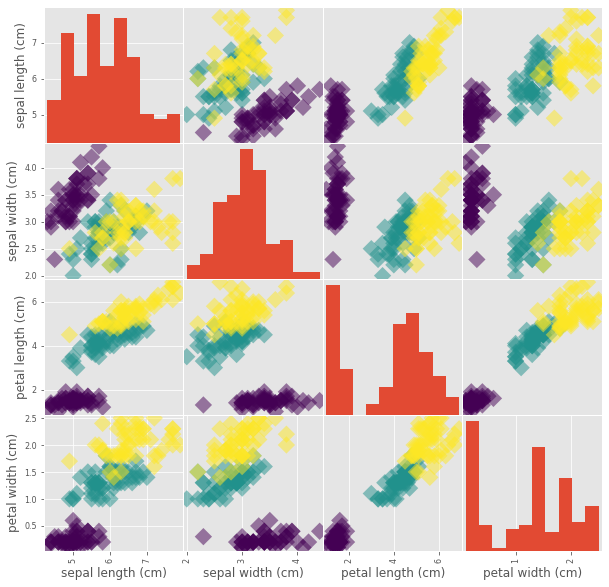

In [8]:
pd.plotting.scatter_matrix(iris_df, c=y, figsize = [10, 10], s=150, marker='D')

## K-Nearest Neighbors Classification

In [9]:
# import library
from sklearn.neighbors import KNeighborsClassifier

In [10]:
# set number of neighbors = 6
knn = KNeighborsClassifier(n_neighbors=6)

# train labeled data with fit() method 
knn.fit(iris['data'], iris['target'])

KNeighborsClassifier(n_neighbors=6)

In [11]:
# Predicting on unlabeled data
X_new = np.array([
    [5.6, 2.8, 3.9, 1.1],
    [5.7, 2.6, 3.8, 1.3],
    [4.7, 3.2, 1.3, 0.2]])


X_new.shape # 3 observations, 4 features

(3, 4)

In [12]:
# do prediction with unlabeled data
prediction = knn.predict(X_new)

In [13]:
prediction 
# predict for versicolor and setosa
# 0 : setosa, 1 : versicolor, 2 : virginica

array([1, 1, 0])

## Measuring model performance

- Accuracy is important
- Split data into training set and test set

In [14]:
# import library
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21, stratify = y)

knn = KNeighborsClassifier(n_neighbors = 8)

# training data with fit method
knn.fit(X_train, y_train)

# make prediction with test data
y_pred = knn.predict(X_test)

In [18]:
# result
y_pred

array([2, 1, 2, 2, 1, 0, 1, 0, 0, 1, 0, 2, 0, 2, 2, 0, 0, 0, 1, 0, 2, 2,
       2, 0, 1, 1, 1, 0, 0, 1, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 1, 0, 2,
       1])

In [19]:
# accuracy score
knn.score(X_test, y_test)

0.9555555555555556

# Example 2 with digits datasets

In [22]:
digits = datasets.load_digits()

In [26]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [23]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [24]:
digits.data.shape

(1797, 64)

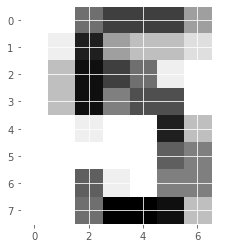

In [32]:
# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

## EDA

In [36]:
X = digits.data
y = digits.target 

## Split data, fit data, and measuring model performance

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)


knn = KNeighborsClassifier(n_neighbors = 7)

# training data with fit method
knn.fit(X_train, y_train)

# make prediction with test data
y_pred = knn.predict(X_test)

In [45]:
# accuracy of 98.33%
knn.score(X_test, y_test)

0.9833333333333333